## Matching Scales

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
import pandas as pd

import pywt # PyWavelets

NCL dataframe is the same as the data from paos = True


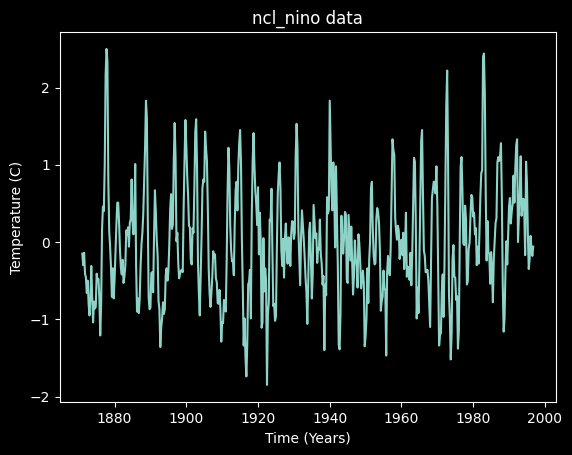

In [9]:
# NCL Output
sst_data = np.loadtxt("data/nino3sst_trimmed.txt")
time_0 = 1871.0
dt = 0.25  # years (4 per year, seasonal)

ncl_data = np.genfromtxt("data/ncl_csv.csv", skip_header=1, delimiter=',')
ncl_data = ncl_data[:,1]
time_range = (np.arange(0, len(ncl_data)) * dt) + time_0 # from 1871.00 to 1996.75
ncl_df = pd.DataFrame({'time (years)': time_range, 'temperature (C)': ncl_data})
ncl_df.head()
print(f"NCL dataframe is the same as the data from paos = {np.all(ncl_df == sst_df)}")

plt.style.use('dark_background')
fig, ax = plt.subplots()
fig = plt.plot(ncl_df["time (years)"], ncl_df["temperature (C)"])
plt.title("ncl_nino data")
plt.xlabel("Time (Years)")
plt.ylabel("Temperature (C)")
plt.show()

wavelets (200) (14, 4): 
['cmor0.5-0.5', 'cmor0.5-0.6', 'cmor0.5-0.7', 'cmor0.5-0.8', 'cmor0.5-0.9', 'cmor0.5-1.0', 'cmor0.5-1.1', 'cmor0.5-1.2', 'cmor0.5-1.3', 'cmor0.5-1.4', 'cmor0.6-0.5', 'cmor0.6-0.6', 'cmor0.6-0.7', 'cmor0.6-0.8', 'cmor0.6-0.9', 'cmor0.6-1.0', 'cmor0.6-1.1', 'cmor0.6-1.2', 'cmor0.6-1.3', 'cmor0.6-1.4', 'cmor0.7-0.5', 'cmor0.7-0.6', 'cmor0.7-0.7', 'cmor0.7-0.8', 'cmor0.7-0.9', 'cmor0.7-1.0', 'cmor0.7-1.1', 'cmor0.7-1.2', 'cmor0.7-1.3', 'cmor0.7-1.4', 'cmor0.8-0.5', 'cmor0.8-0.6', 'cmor0.8-0.7', 'cmor0.8-0.8', 'cmor0.8-0.9', 'cmor0.8-1.0', 'cmor0.8-1.1', 'cmor0.8-1.2', 'cmor0.8-1.3', 'cmor0.8-1.4', 'cmor0.9-0.5', 'cmor0.9-0.6', 'cmor0.9-0.7', 'cmor0.9-0.8', 'cmor0.9-0.9', 'cmor0.9-1.0', 'cmor0.9-1.1', 'cmor0.9-1.2', 'cmor0.9-1.3', 'cmor0.9-1.4', 'cmor1.0-0.5', 'cmor1.0-0.6', 'cmor1.0-0.7', 'cmor1.0-0.8', 'cmor1.0-0.9', 'cmor1.0-1.0', 'cmor1.0-1.1', 'cmor1.0-1.2', 'cmor1.0-1.3', 'cmor1.0-1.4', 'cmor1.1-0.5', 'cmor1.1-0.6', 'cmor1.1-0.7', 'cmor1.1-0.8', 'cmor1.1-0.9',

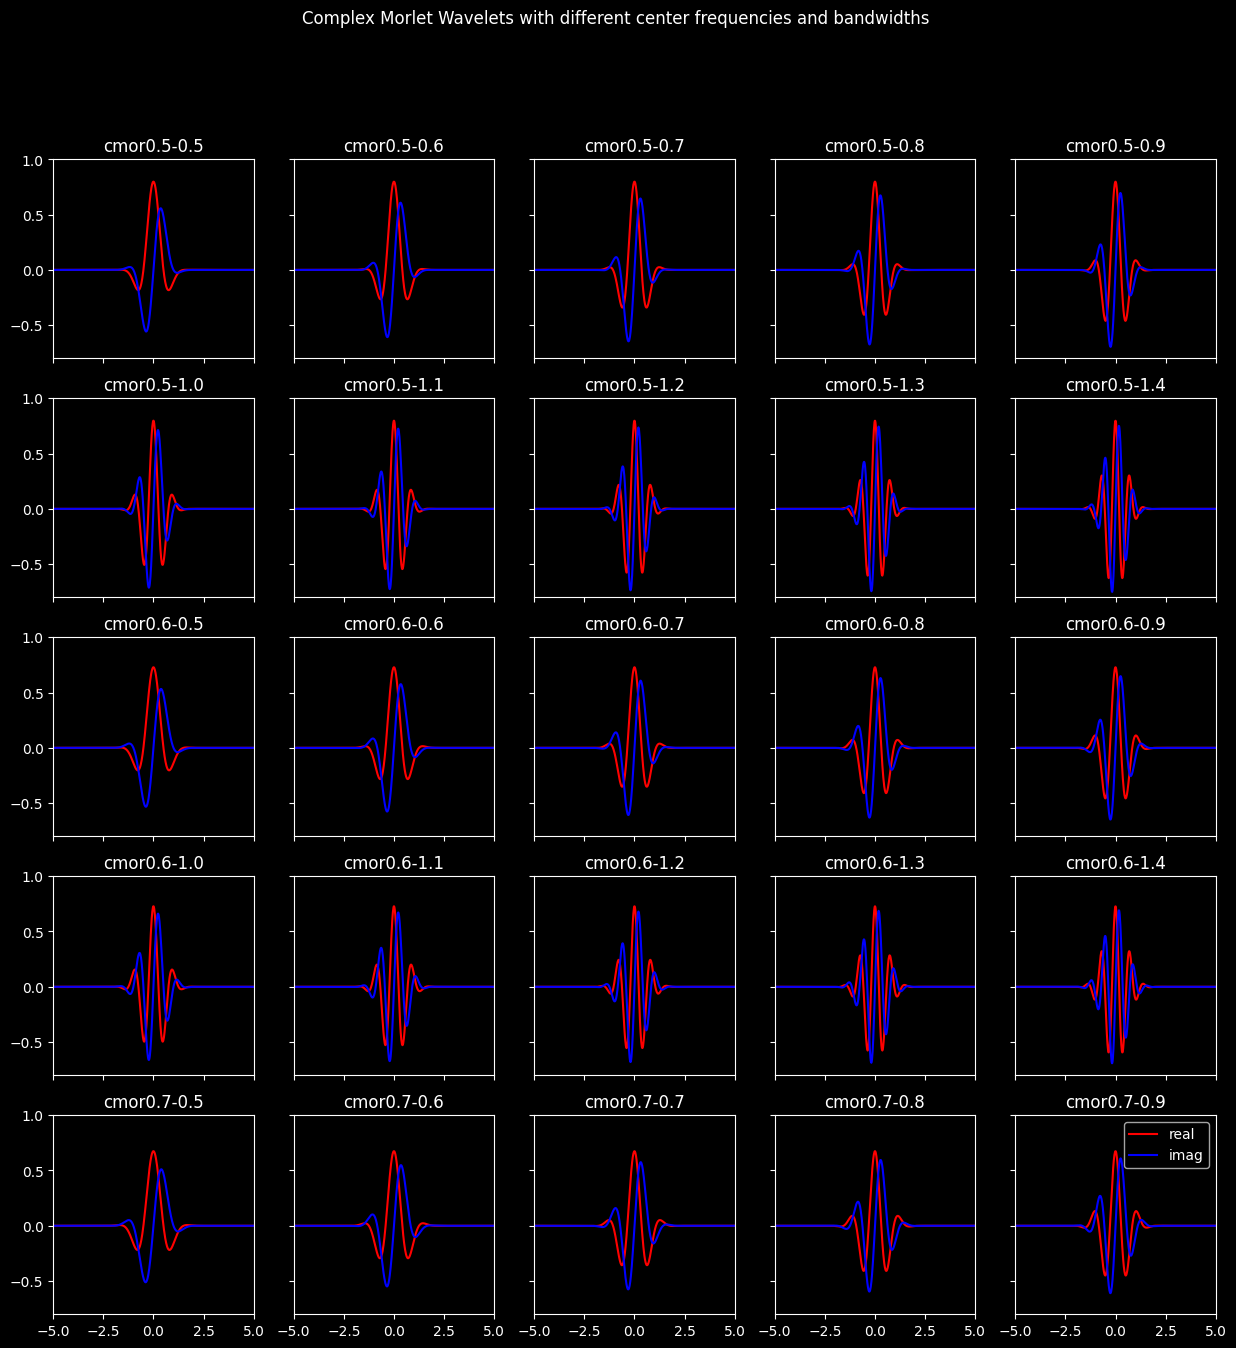

In [38]:
# PyWavelets complex morlet
# https://pywavelets.readthedocs.io/en/latest/ref/cwt.html#wavelet-bandwidth-and-center-frequencies

# plot complex morlet wavelets with different center frequencies and bandwidths
x_range = np.arange(0.5, 2.5, 0.1)#[0.5, 1.5, 2.5]
y_range = np.arange(0.5, 1.5, 0.1)#[0.5, 1.0, 1.5]
wavelets = [f"cmor{x:.1f}-{y:.1f}" for x in x_range for y in y_range]
sub_plot_x = int(math.sqrt(len(wavelets)))
sub_plot_y = len(wavelets) - sub_plot_x**2
print(f"wavelets ({len(wavelets)}) ({sub_plot_x}, {sub_plot_y}): \n{wavelets}")
fig, axs = plt.subplots(sub_plot_n, sub_plot_n, figsize=(15, 15), sharex=True, sharey=True)
for ax, wavelet in zip(axs.flatten(), wavelets):
    [psi, x] = pywt.ContinuousWavelet(wavelet).wavefun(10)
    ax.plot(x, np.real(psi), label="real", c="red")
    ax.plot(x, np.imag(psi), label="imag", c="blue")
    ax.set_title(wavelet)
    ax.set_xlim([-5, 5])
    ax.set_ylim([-0.8, 1])
ax.legend()
plt.suptitle("Complex Morlet Wavelets with different center frequencies and bandwidths")
plt.show()

In [10]:
wavelet_mother = "cmor1.5-1.0"

'''NCL
  mother = 0             ; Morlet wavelet
  param  = 6.0           ; common for Morlet
  dt     = 0.25          
  s0     = 0.25
  dj     = 0.25          ; 4 sub-octaves per octave
  jtot   = 44            ; =subScale*11      
'''

s0 = 0.25
dt = 0.25
dj = 0.25
jtot = 44
scales = np.arange(1, jtot + 1)

wavelet_coeffs, freqs = pywt.cwt(data=sst_data,
                                 scales=scales,
                                 wavelet=wavelet_mother)
# Shape of wavelet transform
print(f"size {wavelet_coeffs.shape} with {wavelet_coeffs.shape[0]} scales and {wavelet_coeffs.shape[1]} time steps")
print(f"x-axis (time) be default is: {wavelet_coeffs.shape[1]}")
print(f"y-axis (scale) be default is: {wavelet_coeffs.shape[0]}")

size (44, 504) with 44 scales and 504 time steps
x-axis (time) be default is: 504
y-axis (scale) be default is: 44


In [11]:
# cmorB-C
# https://pywavelets.readthedocs.io/en/latest/ref/cwt.html#complex-morlet-wavelets
# B = bandwidth
# C = center frequency
import math
import cmath
B = 1.5
C = 1.0 # C * 2 * pi = approx 6 (morlet default)

def complex_morlet_pywavelets(time_step):
    part1 = np.power(math.pi*B, -1/4)
    part2 = math.exp(-np.power(time_step, 2)/B)
    part3 = cmath.exp(1j * 2 * math.pi * C * time_step)
    return part1 * part2 * part3

for time_step in sst_data:
    print(f"sst_data value = {time_step}")
    morlet_output = complex_morlet_pywavelets(time_step)
    print(f"pywavelets c-morlet output = {np.real(morlet_output)}")
    break

# NCL
# https://github.com/yyr/ncl/blob/a7d7f58d467db541157fc730a287547e9d521d5d/ni/src/lib/nfpfort/wavelet.f#L470C13-L470C55
# norm = SQRT(2.D0*pi*scale1/dt)*(pi**(-0.25D0))
##
# Reference: Tables 1 & 2 in
#            Torrence, C. and G. P. Compo, 1998: A Practical Guide to
#            Wavelet Analysis. <I>Bull. Amer. Meteor. Soc.</I>, 79, 61-78.
###

sst_data value = -0.15
pywavelets c-morlet output = 0.39300129833355385
